# State-Space Models

CBE 30338 Class notes for 2/28/2019

* Installing the [Python Control Systems Library](https://python-control.readthedocs.io/en/0.8.1/index.html)
* Introduction to State Space Models
    * Standard form
    * Example: First order model for TCLab
    * Example: Generic first order system with gain and time constant
    * Example: Second order model for TCLab
* Fitting State-Space Models to Experimental Data
    * Example: Fitting the second order model for TCLab
    * Example: Fitting a generic ('black box') second order model
* Exercises

    

## Install the Python Control Systems Library

This notebook will use functions from the [Python Control Systems Library](https://python-control.readthedocs.io/en/0.8.1/index.html) to work with state-space models. The installation is straightforward but typically takes more time than other library installations. Expect anywhere from 1 to 10 minutes to complete the one-time installation.

### Instructons for Anaconda

In [20]:
#!conda install -c conda-forge control -y

### Instructions for Google Colab

In [21]:
#!pip install slycot
#!pip install control

### Test Installation

The following cell should execute without error if the Python Control Systems Library has been correctly installed.

In [22]:
!python -c "import control"

## Introduction to State-Space Models

A state-space model is one where the dynamics of the **state** $x$ is modeled by one or more first order linear differential equation with input $u$.

\begin{align*}
\frac{dx}{dt} & = Ax + Bu \\
y & = C x + D u 
\end{align*}

The second equation provides for the case where the process output $y$ is different from the state. Normally $x$, $y$, and $u$ are deviation variables.  $A$, $B$, $C$, and $D$ are parameters pertaining the a particular application.
 

### Example: First Order Model for the Temperature Control Laboratory

As an example, consider our model equation for temperature control lab experiment,

\begin{align*}
C_p \frac{dT}{dt} & = U_a(T_{amb} - T) + P u \\
\end{align*}

We'll define the state as the deviation variable $x = T - T_{amb}$ and directly measure $x$. Simple algebraic manipulations allow to recast thei is standard form of a state-space model.

\begin{align*}
\frac{dx}{dt} & = \underbrace{-\frac{U_a}{C_p}}_{A} x + \underbrace{\frac{P}{C_p}}_{B} u \\
y  & = \underbrace{(1)}_C x + \underbrace{(0)}_D u
\end{align*}

The next cell shows how to create a state-space model using the Python Control Systems Library using data measured on the Temperature Control Laboratory.  There are many things that can be done with a state-space model, such as plotting the response to unit step input as shown in the next cell.

A = [[-0.00833333]]

B = [[0.29166667]]

C = [[1]]

D = [[0]]



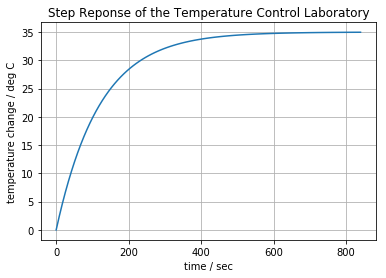

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import control

# parameter estimates
P = 4*0.05   # power input when the system is turned on, i.e., 50% of 4 watts
Ua = P/35    # the steady state temperaure increase is 35 deg C. 
Cp = 120*Ua  # determined from first-order time constant tau = 250

# state space parameters
A = -Ua/Cp
B = P/Cp
C = 1
D = 0

# create the state space model object
tclab = control.StateSpace(A, B, C, D)
print(tclab)

# perform the step response simulation returning vectors with time and output
t, y = control.step_response(tclab)

# plot the results
plt.plot(t,y)
plt.xlabel('time / sec')
plt.ylabel('temperature change / deg C')
plt.title('Step Reponse of the Temperature Control Laboratory')
plt.grid(True)

### Example: Generic First-Order Process Model

For process control it is useful to define a generic first-order model defined by a characteristic time constant $\tau$ and steady-state gain $K$ that is written as

\begin{align*}
\tau \frac{dy}{dt} + y & = K u \\
\end{align*}

where $u$ is a deviation in a process input, and $y$ is the observed deviation in process response.

This model can be rearranged into state-space form. First identify the state as $x = y$. Then rearrange the equations into the following form

\begin{align*}
\frac{dx}{dt} & = \underbrace{-\frac{1}{\tau}}_{A} x + \underbrace{\frac{K}{\tau}}_{B} u \\
y  & = \underbrace{(1)}_C x + \underbrace{(0)}_D u
\end{align*}

The next cell demonstrates how to plot the step response for a system with a time constant of $\tau=3$ minutes and a gain $K = 12$. Here we let the step response function automatically generate the time grid.

A = [[-0.33333333]]

B = [[4.]]

C = [[1]]

D = [[0]]



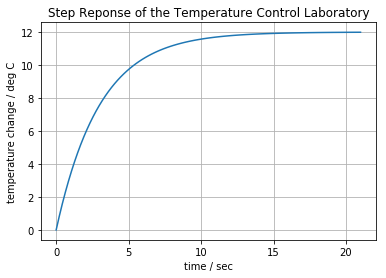

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import control 

# parameters for a generic first order system
K = 12
tau = 3

# compute parameters for an equivalent state space model
A = -1/tau
B = K/tau
C = 1
D = 0

# create the state space model object
sys = control.StateSpace(A, B, C, D)
print(sys)

# perform the step response simulation returning vectors with time and output
t, y = control.step_response(sys)

# plot the results
plt.plot(t,y)
plt.xlabel('time / sec')
plt.ylabel('temperature change / deg C')
plt.title('Step Reponse of the Temperature Control Laboratory')
plt.grid(True)

## Multivariable State Space Models

The great value of state space models is that they provide a natural way to model complex systems succinctly. The key is to recognize that $u$, $x$, and $y$ can be extended to vectors tat include many process variables. The corresponding parameters $A$, $B$, $C$, and $D$ are then matrix quantities that can account for the complex interactions among the process variables.

### Example: Temperature Control Lab

Here we extend the model for the temperature control to account for a difference between the heater temperature $T_H$ and sensor temperature $T_S$. The model is written as

\begin{align*}
C^H_p \frac{dT_H}{dt} & = U_a (T_{amb} - T_H) + U_c(T_S - T_H) + P u \\
C^S_p \frac{dT_S}{dt} & = U_c(T_H - T_S)
\end{align*}

where $C^H_p$ and $C^S_p$ are the total heat capacities of the heater and sensor, respectively. $U_c$ is the total heat transfer coefficient corresponding to the heat flux between the heater and sensor.

The state variables denote the deviation of the heater and sensor temperatures from room temperature. These are given by $x_1 = T_H - T_{amb}$ and $x_2 = T_S - T_{amb}$, respectively. Because $x_1$ and $x_2$ use the same reference for computing deviations, $T_S - T_H = x_2 - x_1$.  

\begin{align*}
C^H_p \frac{dx_1}{dt} & = -U_a x_1 + U_c(x_2 - x_1) + P u \\
C^S_p \frac{dT_S}{dt} & = U_c(x_1 - x_2)
\end{align*}

Gathering terms in $x_1$ and $x_2$, and adding an algebraic equation to show how the available measurements are related to the state variables

\begin{align*}
\frac{dx_1}{dt} & = -\frac{(U_a + U_c)}{C^H_p} x_1 + \frac{U_c}{C^H_p} x_2 + \frac{P}{C^H_p} u \\
\frac{dx_2}{dt} & = \frac{U_c}{C^S_p} x_1 -  \frac{U_c}{C^S_p} x_2 \\
y & = x_2
\end{align*}

The next step is streamline this model using a matrix/vector notation

\begin{align*}
\frac{d}{dt}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} & = 
\begin{bmatrix} -\frac{(U_a + U_c)}{C^H_p} & \frac{U_c}{C^H_p} \\ \frac{U_c}{C^S_p} & -\frac{U_c}{C^S_p} \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} +
\begin{bmatrix} \frac{P}{C^H_p} \\ 0 \end{bmatrix} u \\
y & = \begin{bmatrix} 0 &  1 \end{bmatrix}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} + \begin{bmatrix} 0 \end{bmatrix} u
\end{align*}

The final step is to label the matrices and vectors

\begin{align*}
\frac{d}{dt}\begin{bmatrix} x_1 \\ x_2 \end{bmatrix} & = 
\underbrace{\begin{bmatrix} -\frac{(U_a + U_c)}{C^H_p} & \frac{U_c}{C^H_p} \\ \frac{U_c}{C^S_p} & -\frac{U_c}{C^S_p} \end{bmatrix}}_A \underbrace{\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}}_x +
\underbrace{\begin{bmatrix} \frac{P}{C^H_p} \\ 0 \end{bmatrix}}_B u \\
y & = \underbrace{\begin{bmatrix} 0 &  1 \end{bmatrix}}_C 
\underbrace{\begin{bmatrix} x_1 \\ x_2 \end{bmatrix}}_x + \underbrace{\begin{bmatrix} 0 \end{bmatrix}}_D u
\end{align*}

The next cell shows how to create a python object representing this model, then use it to create the simulated step response.

A = [[-0.01851852  0.00925926]
 [ 0.09259259 -0.09259259]]

B = [[0.32407407]
 [0.        ]]

C = [[0 1]]

D = [[0]]



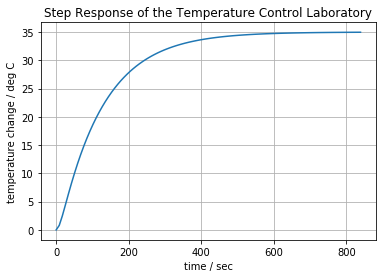

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control 

# parameter estimates
P = 4*0.5         # power input when the system is turned on, i.e., 50% of 4 watts
Ua = P/35         # the steady state temperaure increase is 35 deg C. 
CpH = 0.9*120*Ua  # assign 90% of the heat capacity to the heater
CpS = 0.1*CpH     # assign 90% of the heat capacity to the heater
Uc = Ua           # 

# compute parameters for an equivalent state space model
A = [[-(Ua + Uc)/CpH, Uc/CpH], [Uc/CpS, -Uc/CpS]]
B = [[P/CpH], [0]] # single column
C = [[0, 1]]   # single row
D = [[0]]

# create the state space model object
tclab2 = control.StateSpace(A, B, C, D)
print(tclab2)

# perform the step response simulation returning vectors with time and output
t, y = control.step_response(tclab2)

# plot the results
plt.plot(t,y)
plt.xlabel('time / sec')
plt.ylabel('temperature change / deg C')
plt.title('Step Response of the Temperature Control Laboratory')
plt.grid(True)

## Fitting State Space Models to Data

### Accessing Experimental Data

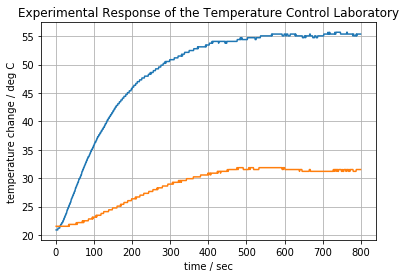

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# read data from saved spreadsheet (.csv) file
data = pd.read_csv('Step_Test_Data.csv').set_index('Time')[1:]
tdata = data.index
T1data = data['T1'].values
T2data = data['T2'].values

# plot data
plt.plot(tdata, T1data, tdata, T2data)
plt.xlabel('time / sec')
plt.ylabel('temperature change / deg C')
plt.title('Experimental Response of the Temperature Control Laboratory')
plt.grid(True)

The next cell creates a deviation variable for the temperature of the first sensor.

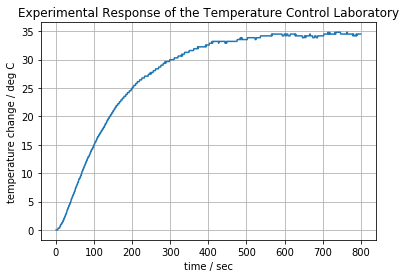

In [27]:
# interpolate to an evenly spaced time grid
t = np.linspace(min(tdata), max(tdata), len(tdata))
ydata = np.interp(t, tdata, T1data-T1data[0])

# plot data
plt.plot(t, ydata)
plt.xlabel('time / sec')
plt.ylabel('temperature change / deg C')
plt.title('Experimental Response of the Temperature Control Laboratory')
plt.grid(True)

### Fitting the two-state model for TCLab to experimental data

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control
from ipywidgets import interact

P = 4*0.5          # watts

def compare(Ua, Uc, CpH, CpS):

    print('Ua = ' + str(Ua), '\nUc = ' + str(Uc),
          '\nCpH = ' + str(CpH), '\nCpH = ' + str(CpS))
        
    A = [[-(Ua + Uc)/CpH, Uc/CpH], [Uc/CpS, -Uc/CpS]]
    B = [[P/CpH], [0]]
    C = [[0, 1]]
    D = [[0]]

    # create the state space model object
    tclab2 = control.StateSpace(A, B, C, D)

    # plot the response to a unit step input
    t = np.linspace(min(tdata), max(tdata), len(tdata))
    t, y, x = control.step_response(tclab2, t, return_x=True)
    err = np.linalg.norm(x[1] - ydata)

    plt.figure(figsize=(12, 3))
    plt.subplot(1, 2, 1)
    plt.plot(t, x[0], t, x[1])
    plt.plot(t, ydata)
    plt.legend(['Heater', 'Sensor'])
    plt.xlabel('time / sec')
    plt.ylabel('temperature change / deg C')
    plt.title('Step Reponse of the Temperature Control Laboratory')
    plt.grid(True)
    
    plt.subplot(1, 2, 2)
    plt.plot(t, x[1]-ydata)
    plt.title('Error = ' + str(round(err,3)))
    plt.grid(True)
    plt.tight_layout()
    
interact(compare,
    Ua=(0,0.08,0.001), 
    Uc=(0,0.06,0.001), 
    CpH=(3,11,0.1), 
    CpS = (0.1,2,.01))

interactive(children=(FloatSlider(value=0.04, description='Ua', max=0.08, step=0.001), FloatSlider(value=0.03,…

<function __main__.compare(Ua, Uc, CpH, CpS)>

## Fitting a Generic Second Order Model

A generic model for a stable second order system is given the form
\begin{align*}
\tau^2 \frac{d^2y}{dt^2} + 2\zeta\tau\frac{dy}{dt} + y & = K u
\end{align*}

where $K$ is the steady-state gain, $\tau$ is a time constant, and $\zeta$ is the damping factor. A value of $0 \leq \zeta \lt 1$ corresponds to an **underdamped** system, a value $\zeta > 1$ is **overdamped**, and a value $\zeta = 1$ separating these two categories is called **critically** damped.

Now we'll show how this system can written as a state-space model with two states. Start by choosing

\begin{align*}
x_1 & = y \\
x_2 & = \frac{dy}{dt}
\end{align*}

Taking derivatives

\begin{align*}
\frac{dx_1}{dt} & = \frac{dy}{dt} = x_2 \\
\frac{dx_2}{dt} & = \frac{d^2y}{dt^2} = -\frac{1}{\tau^2}x_1 - \frac{2\zeta}{\tau}x_2 + \frac{K}{\tau^2} u
\end{align*}

From here we can write out a state-space version of this model

\begin{align*}
\frac{d}{dt}\begin{bmatrix}x_1 \\ x_2\end{bmatrix} & =
\underbrace{\begin{bmatrix}0 & 1 \\ -\frac{1}{\tau^2} & - \frac{2\zeta}{\tau}\end{bmatrix}}_A \underbrace{\begin{bmatrix}x_1 \\ x_2\end{bmatrix}}_x + \underbrace{\begin{bmatrix} 0 \\ \frac{K}{\tau^2}\end{bmatrix}}_B u \\
y & = \underbrace{\begin{bmatrix}1 & 0\end{bmatrix}}_C \underbrace{\begin{bmatrix}x_1 \\ x_2\end{bmatrix}}_x + \underbrace{\begin{bmatrix}0\end{bmatrix}}_D u
\end{align*}

In [122]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control
from ipywidgets import interact

# read data from saved spreadsheet (.csv) file
data = pd.read_csv('Step_Test_Data.csv').set_index('Time')[1:]
tdata = data.index
Tdata = data['T1'].values

# interpolate to an evenly spaced time grid
t = np.linspace(min(tdata), max(tdata), len(tdata))
ydata = np.interp(t, tdata, Tdata-Tdata[0])

K = 35        # determined from first-order time constant tau = 250
tau = 150      # time constant
zeta = 1      # determined from steady-state step response

def compare(K, tau, zeta):

    print('K = ' + str(K), '\ntau = ' + str(tau), '\nzeta = ' + str(zeta))
        
    A = [[0, 1], [-1/tau**2, -2*zeta/tau]]
    B = [[0], [K/tau**2]]
    C = [[1, 0]]
    D = [[0]]

    # create the state space model object
    tclab2 = control.StateSpace(A, B, C, D)

    # plot the response to a unit step input
    t = np.linspace(min(tdata), max(tdata), len(tdata))
    t, y = control.step_response(tclab2, t)
    err = np.linalg.norm(x[1] - ydata)

    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, y)
    plt.plot(t, ydata)
    plt.legend(['Heater', 'Sensor'])
    plt.xlabel('time / sec')
    plt.ylabel('temperature change / deg C')
    plt.title('Step Reponse of the Temperature Control Laboratory')
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(t, y-ydata)
    plt.title('Error = ' + str(round(err,3)))
    plt.grid(True)
    plt.tight_layout()
    
interact(compare,
    K = (0, 50, .5), 
    tau = (10, 180, 2), 
    zeta = (0, 3, .03))

interactive(children=(FloatSlider(value=25.0, description='K', max=50.0, step=0.5), IntSlider(value=94, descri…

<function __main__.compare(K, tau, zeta)>

## Two First Order Systems in Series

\begin{align*}
\tau_1\frac{dy_1}{dt} + y_1 & = K_1 u \\
\tau_2\frac{dy_2}{dt} + y_2 & = K_2 y_1 
\end{align*}

Recasting as a state-space model

\begin{align*}
\frac{d}{dt}\begin{bmatrix}x_1 \\ x_2\end{bmatrix} & =
\underbrace{\begin{bmatrix}-\frac{1}{\tau_1} & 0 \\ \frac{K_2}{\tau_2} & - \frac{1}{\tau_2}\end{bmatrix}}_A \underbrace{\begin{bmatrix}x_1 \\ x_2\end{bmatrix}}_x + \underbrace{\begin{bmatrix} \frac{K_1}{\tau_1} \\ 0\end{bmatrix}}_B u \\
y & = \underbrace{\begin{bmatrix}0 & 1\end{bmatrix}}_C \underbrace{\begin{bmatrix}x_1 \\ x_2\end{bmatrix}}_x + \underbrace{\begin{bmatrix}0\end{bmatrix}}_D u
\end{align*}

Note that $K_1$ and $K_2$ are not independent.  

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import control
from ipywidgets import interact

# read data from saved spreadsheet (.csv) file
data = pd.read_csv('Step_Test_Data.csv').set_index('Time')[1:]
tdata = data.index
Tdata = data['T1'].values

# interpolate to an evenly spaced time grid
t = np.linspace(min(tdata), max(tdata), len(tdata))
ydata = np.interp(t, tdata, Tdata-Tdata[0])

K = 35        # determined from first-order time constant tau = 250
tau1 = 80      # time constant
tau2 = 20     # determined from steady-state step response

def compare(K, tau1, tau2):

    print('K = ' + str(K), '\ntau1 = ' + str(tau1), '\ntau2 = ' + str(tau2))
        
    A = [[-1/tau1, 0], [1/tau2, -1/tau2]]
    B = [[K/tau1], [0]]
    C = [[0, 1]]
    D = [[0]]

    # create the state space model object
    tclab2 = control.StateSpace(A, B, C, D)

    # plot the response to a unit step input
    t = np.linspace(min(tdata), max(tdata), len(tdata))
    t, y = control.step_response(tclab2, t)
    err = np.linalg.norm(y - ydata)

    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(t, y)
    plt.plot(t, ydata)
    plt.legend(['Heater', 'Sensor'])
    plt.xlabel('time / sec')
    plt.ylabel('temperature change / deg C')
    plt.title('Step Reponse of the Temperature Control Laboratory')
    plt.grid(True)
    
    plt.subplot(2, 1, 2)
    plt.plot(t, y-ydata)
    plt.title('Error = ' + str(round(err,3)))
    plt.grid(True)
    plt.tight_layout()
    
interact(compare,
    K = (10, 50, .2), 
    tau1 = (10, 180, 1), 
    tau2 = (10, 180, 1))

interactive(children=(FloatSlider(value=30.0, description='K', max=50.0, min=10.0, step=0.2), IntSlider(value=…

<function __main__.compare(K, tau1, tau2)>

### Exercises

1. Use the sliders above to find best fit values for $U_a$, $U_c$, $C^H_p$, $C^S_p$ for the two state model of the temperature control laboratory.  Report your results to two digits, including values for the total error. Estimate the individual time constants for the heater and sensor by computing the ratios $\tau_H = \frac{C^H_p}{U_a}$ and $\tau_S = \frac{C^S_p}{U_c}$.

2. In a new Jupyter notebook, develop and implement a state-space model for problem 2.3 of the textbook. Signal $w_1$ is the input to the system, and flowrates $w_2$ and $w_3$ are the process outputs. Is the system underdamped or overdamped? Use the chart in Figure 5.9 to estimate the period and decay ratio. Use the chart in Figure 5.10 to estimate the damping factor $\zeta$.

NOTE: For problem 2, use $A_1$ = 2 square meter, $A_2$ = 1 square meter, $R_2$ = 10 and $R3$ = 5 where flow is given in units of cubic meters per minute.  Consult equation 2-56 on how to use these parameters